## Audio Manipulation

### Fading Technique
Fading is usually at the start of the end to make a smooth entrence to an audio

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import os

file_path = os.path.join(os.getcwd(), 'attachment', 'strings.wav')

# check apakah file ada
if not os.path.exists(file_path):
    print('File tidak ditemukan')

## Check the properties of an audio
Given the `wav` files, we can get the some basic properties, such channel, sampling rate 

Jumlah channel: 1
Frekuensi Sampling: 44100 Hz


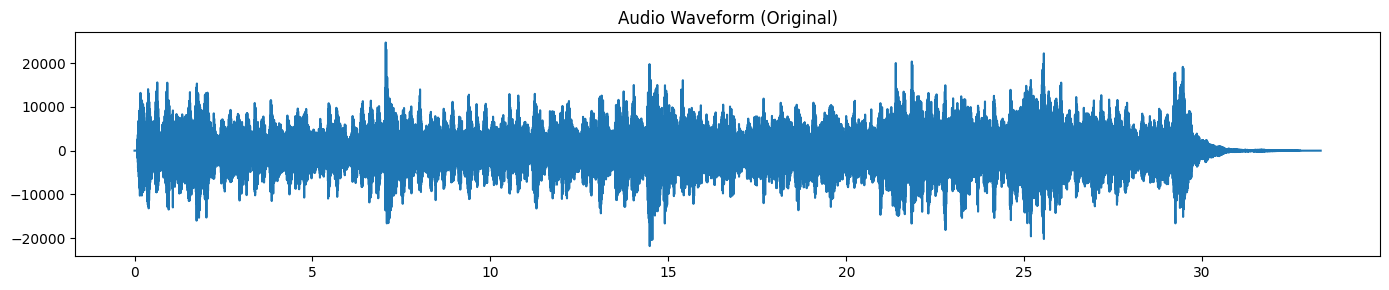

In [72]:
with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
print(f"Jumlah channel: {n_channels}")
print(f"Frekuensi Sampling: {fs} Hz")

time_axis_second = np.linspace(0, n_samples/fs, n_samples)

plt.figure(figsize=(14, 3))
plt.plot(time_axis_second, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

## Membuat Kurva Linear Fading

1. Tahap pertama adalah membuat kurva linear fading. Kita harus menentukan durasi dari fading yang diinginkan
2. Nantinya kurva linear ini akan dikalikan dengan data audio yang sebenarnya

Kurva linear berisi angka-angka pengali, mulai dari 0 hingga 1 sepanjang durasi fading

[0.00000000e+00 4.53516796e-06 9.07033592e-06 ... 9.99990930e-01
 9.99995465e-01 1.00000000e+00]
Length fade in curve: 220500


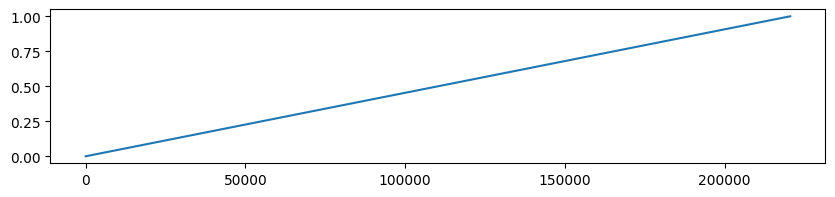

In [73]:
durasi_fading_detik = 5 # detik
durasi_fading_sample = durasi_fading_detik * fs

fade_in_curve = np.linspace(0, 1, durasi_fading_sample)
print(fade_in_curve)
print(f"Length fade in curve: {len(fade_in_curve)}")
plt.figure(figsize=(10, 2))
plt.plot(fade_in_curve)
plt.show()

## Mengalikan Kurva Linear Fading dengan `audio_data`
Let's multiply the audio file with the fade_in curve

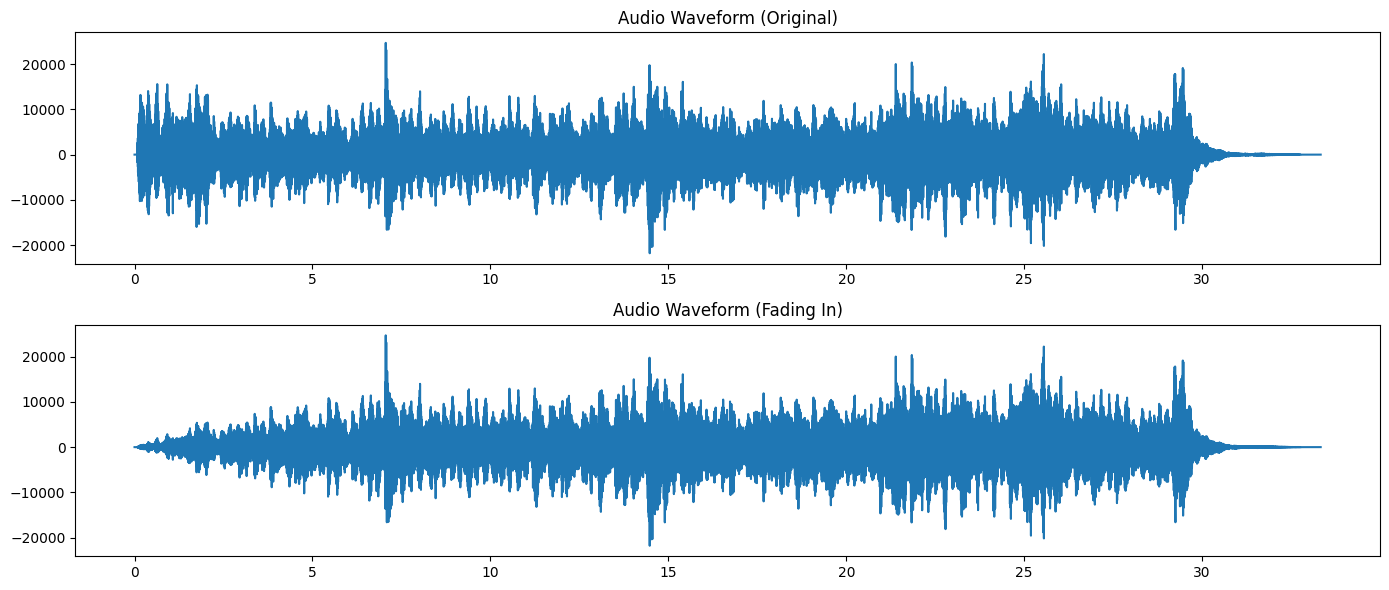

In [74]:

audio_data_fading = audio_data.copy()
audio_data_fading[:durasi_fading_sample] = audio_data_fading[:durasi_fading_sample] * fade_in_curve

time_axis_second = np.linspace(0, n_samples/fs, n_samples)

ax, fig = plt.subplots(2, 1, figsize=(14, 6))
fig[0].plot(time_axis_second, audio_data)
fig[0].set_title('Audio Waveform (Original)')
fig[1].plot(time_axis_second, audio_data_fading)
fig[1].set_title('Audio Waveform (Fading In)')
plt.tight_layout()
plt.show()

## Lastly let's heard the audio
We create a new wave file out of this from the some characteristic

In [75]:
save_path = os.path.join(os.getcwd(), 'attachment', 'strings_fading_in.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sample_width)
    wav_file.setframerate(fs)
    wav_file.writeframes(audio_data_fading.tobytes())

## Challenge
- Create a fade-out with duration 5 detik

[1.00000000e+00 9.99995465e-01 9.99990930e-01 ... 9.07033592e-06
 4.53516796e-06 0.00000000e+00]
Length fade in curve: 220500


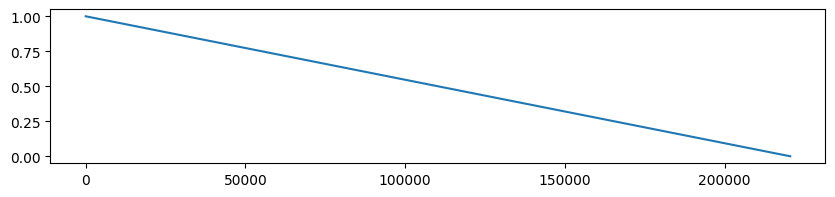

In [76]:
## Fade out mechanism
fading_sample_duration = fs * 5

## Create a landown slope for fading out
fade_out_curve = np.linspace(1, 0, fading_sample_duration)
print(fade_out_curve)
print(f"Length fade in curve: {len(fade_out_curve)}")
plt.figure(figsize=(10, 2))
plt.plot(fade_out_curve)
plt.show()

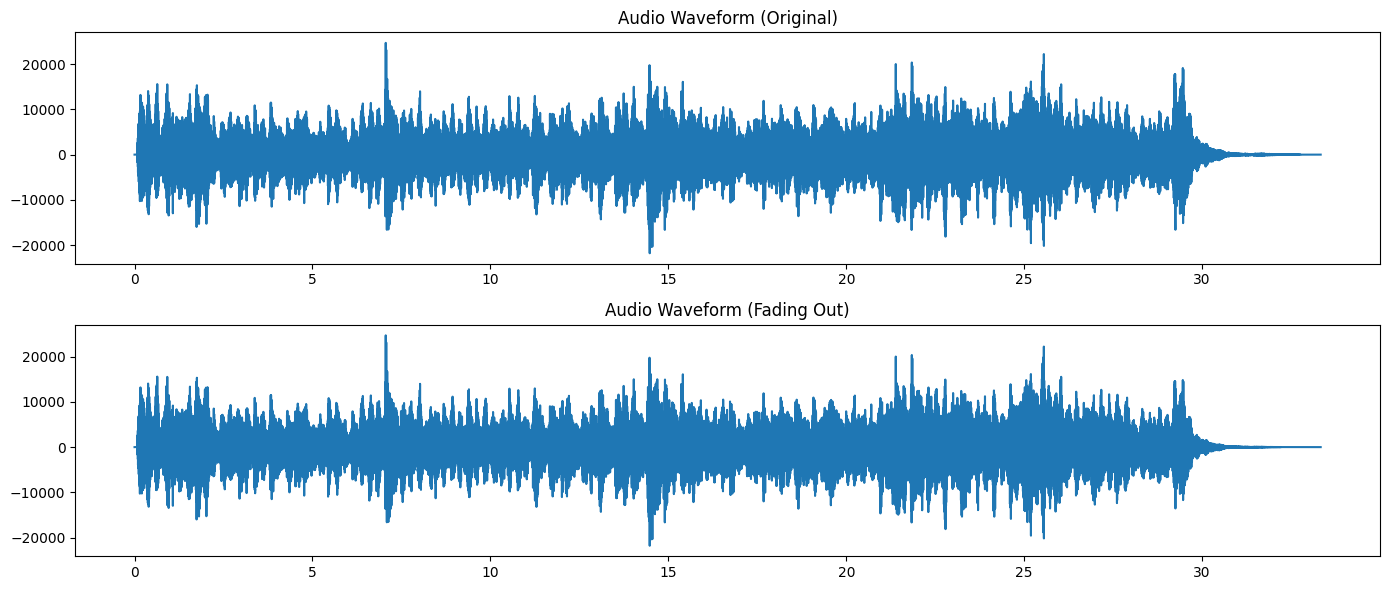

In [77]:
## Multiply the result
audio_fading_out = audio_data.copy()
audio_fading_out[-fading_sample_duration:] = audio_fading_out[-fading_sample_duration:] * fade_out_curve

time_axis_second = np.linspace(0, n_samples/fs, n_samples)

ax, fig = plt.subplots(2, 1, figsize=(14, 6))
fig[0].plot(time_axis_second, audio_data)
fig[0].set_title('Audio Waveform (Original)')
fig[1].plot(time_axis_second, audio_fading_out)
fig[1].set_title('Audio Waveform (Fading Out)')
plt.tight_layout()
plt.show()

## Audio Normalizatoin
**Apa itu normalisasi?**
- Normalisasi adalah proses mengubah level suara (tingkat amplitudo / volume) dari audio sehingga level suara tertinggi dari audio tersebut menjadi 0 dBFS (decibels relative to full scale).

**Mengapa harus 0 dBFS? Mengapa tidak 1?**
- Karena 0 dBFS adalah level tertinggi yang bisa dicapai oleh audio digital. Jika level suara melebihi 0 dBFS, maka audio tersebut akan distorsi.


In [78]:
file_path = os.path.join(os.getcwd(), 'attachment', 'this_is_me.wav')

# check apakah file ada
if not os.path.exists(file_path):
    print('File tidak ditemukan')
    
with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
print(f"Jumlah channel: {n_channels}")
print(f"Frekuensi Sampling: {fs} Hz")
print(f"Jumlah sampel: {n_samples}")

Jumlah channel: 1
Frekuensi Sampling: 44100 Hz
Jumlah sampel: 337856


## Trim Audio

Kita hanya mau melakukan normalisasi pada bagian awal percakapan di rekaman suara tersebut. Oleh karena itu, kita perlu memotong audio tersebut.

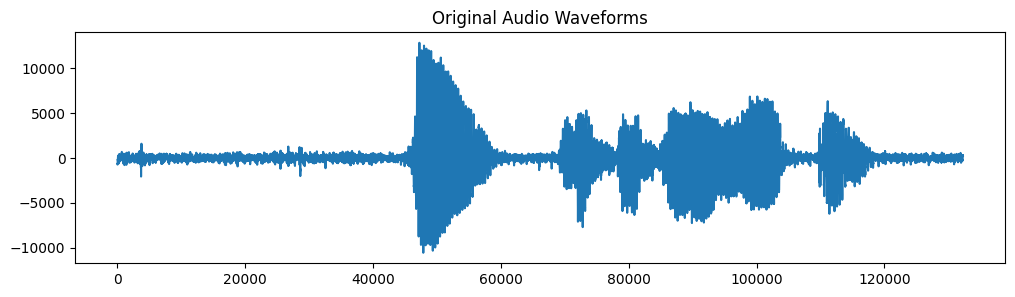

In [79]:
trim_seconds = 3 
sample_trim = trim_seconds * fs

front_audio = audio_data[:sample_trim]

plt.figure(figsize=(12, 3))
plt.plot(front_audio)
plt.title("Original Audio Waveforms")
plt.show()

## Normalization

Untuk melakukan normalisasi, hal pertama yang dilakukan adalah **mencari nilai maksimum dari audio tersebut.** Setelah itu, kita akan mengalikan audio tersebut dengan nilai normalisasi yang diinginkan sehingga nilai maksimum dari audio tersebut menjadi 0 dBFS.

In [80]:
nilai_max = np.max(np.abs(front_audio))
print(f"Nilai maksimum: {nilai_max}")

Nilai maksimum: 12848


Setelah itu, kita mengingkan agar `nilai_max` ini menjadi bernilai 0 dBFS atau dalam integer bernilai `32767`

Sehingga, rumus perhitungan yang digunakan adalah:
$$
\text{audio normalized} = \frac{\text{audio}}{\text{nilai max}} \times 32767
$$

>Warning:
>Perhitungan menggunakan `32767` adalah asumsi bahwa audio tersebut memiliki bit depth 16-bit.
> Jika audio tersebut memiliki bit depth yang berbeda, maka nilai `32767` tersebut harus disesuaikan

**Mengapa 32767 berhubungan dengan 16-bit?**
- Karena nilai maksimum yang bisa dicapai oleh 16-bit adalah $2^{16-1} - 1 = 32767$ atau $2^{16} / 2 - 1 = 32767$

In [81]:
normalized_front_audio = front_audio / nilai_max * 32767 # Assuming 16 bit
print(f"First 20 samples : {normalized_front_audio[:20]}")

First 20 samples : [-1678.13558531 -1749.54561021 -1800.55277086 -1841.35849938
 -1846.45921544 -1851.55993151 -1826.05635118 -1775.04919054
 -1713.84059776 -1644.98093088 -1596.52412827 -1540.41625156
 -1481.75801681 -1428.20049813 -1351.68975716 -1287.93080635
 -1234.37328767 -1183.36612702 -1142.56039851 -1106.85538605]


## Fixed the types
To ensure the samples are purely 16 bit integer, you must convert it

In [82]:
normalized_front_audio = normalized_front_audio.astype(np.int16)
print(f"20 nilai pertama: {normalized_front_audio[:20]}")

20 nilai pertama: [-1678 -1749 -1800 -1841 -1846 -1851 -1826 -1775 -1713 -1644 -1596 -1540
 -1481 -1428 -1351 -1287 -1234 -1183 -1142 -1106]


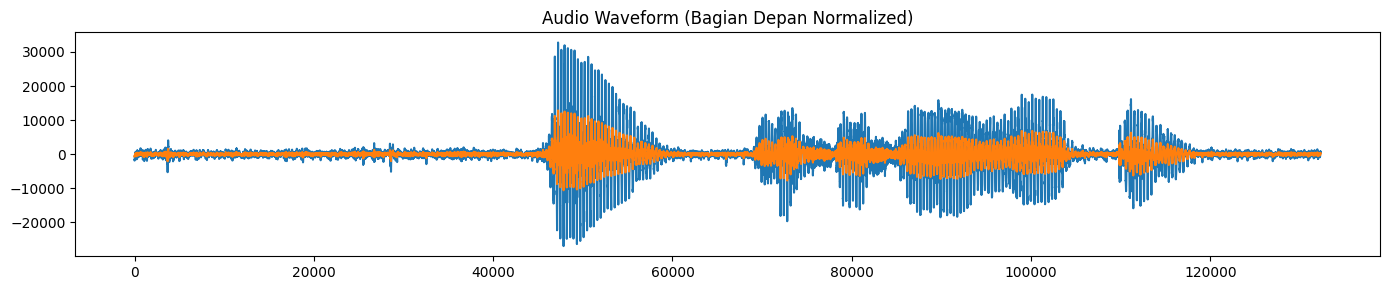

In [83]:
plt.figure(figsize=(14, 3))
plt.plot(normalized_front_audio, label='Normalized')
plt.plot(front_audio, label='Original')
plt.title('Audio Waveform (Bagian Depan Normalized)')
plt.tight_layout()
plt.show()

### Mari kita kembalikan `normalized_front_audio` ke `front_audio` asli

In [84]:
audio_data_hasil_normalized = np.concatenate([normalized_front_audio, audio_data[sample_trim:]])

print(len(audio_data_hasil_normalized))
# ax, fig = plt.subplots(2, 1, figsize=(14, 6))
# fig[0].plot(time_axis_second, audio_data)
# fig[0].set_title('Audio Waveform (Original)')
# fig[1].plot(time_axis_second, audio_data_hasil_normalized)
# fig[1].set_title('Audio Waveform (Normalized Bagian Depan)')
# plt.tight_layout()
# plt.show()

337856


### Let's hear that

In [85]:
save_path = os.path.join(os.getcwd(), 'attachment', 'this_is_me_normalized.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sample_width)
    wav_file.setframerate(fs)
    wav_file.writeframes(audio_data_hasil_normalized.tobytes())

## Menghitung Loudness (Kebisingan) Audio

Jumlah channel: 1
Frekuensi Sampling: 44100 Hz
Jumlah sampel: 1469952


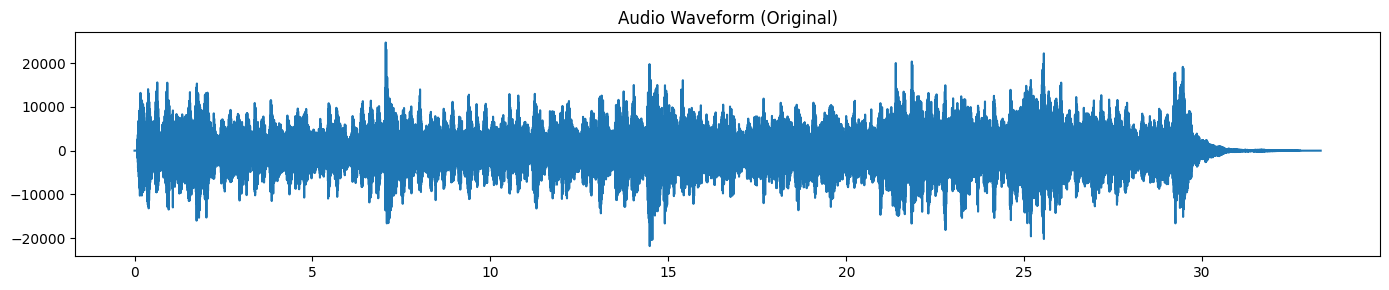

In [86]:
file_path = os.path.join(os.getcwd(), 'attachment', 'strings.wav')

# check apakah file ada
if not os.path.exists(file_path):
    print('File tidak ditemukan')

with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
print(f"Jumlah channel: {n_channels}")
print(f"Frekuensi Sampling: {fs} Hz")
print(f"Jumlah sampel: {n_samples}")

time_axis_second = np.linspace(0, n_samples/fs, n_samples)

plt.figure(figsize=(14, 3))
plt.plot(time_axis_second, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

## dBFS (decibel Full Scale)

dBFS adalah satuan untuk mengukur level suara dalam audio digital. 0 dBFS adalah level tertinggi yang bisa dicapai oleh audio digital.

In [87]:
## Mengubah menjadi Float32
audio_float = audio_data.astype(np.float32) / 32767.0

Langkah 2: Menghitung dBFS

Rumusnya adalah:
$$
 dbfs = 20 \times \log_{10} \left( \frac{rms}{\text{nilai maksimum}} \right)
$$

In [88]:
peak_amplitude = np.max(np.abs(audio_float))
dbfs = 20 * np.log10(peak_amplitude)
print(f"dbfs: {dbfs}")

dbfs: -2.459718883037567


## LUFS (Loudness Unit Full Scale)

LUFS adalah satuan untuk mengukur loudness dari audio. LUFS adalah satuan yang lebih baik daripada dBFS karena LUFS memperhitungkan loudness dari audio tersebut dalam jangka waktu yang lama.

Langkah 1: Menentukan b dan a

In [89]:
with wave.open(file_path, "r") as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)

In [90]:
b = np.array([1.53512485958697, -2.69169618940638, 1.19839281085285])
a = np.array([1.0, -1.69065929318241, 0.73248077421585])

In [91]:
audio_data_float = audio_data.astype(np.float32) / np.iinfo(np.int16).max
filtered_audio = np.zeros_like(audio_data_float)
for i in range(len(audio_data_float)):
    if i < 2:
        filtered_audio[i] = audio_data_float[i]
    else:
        filtered_audio[i] = b[0] * audio_data_float[i] + b[1] * audio_data_float[i-1] + b[2] * audio_data_float[i-2] - a[1] * filtered_audio[i-1] - a[2] * filtered_audio[i-2]

In [92]:
## Menghitung Mean Square
ms = np.mean(np.square(filtered_audio))

Langkah 4: Menghitung LUFS-nya

Rumusnya adalah:
$$
lufs = -0.691 + 10 \times \log_{10} \left( \frac{1}{N} \times \sum_{n=1}^{N} 10^{0.1 \times \text{data}[n]} \right)
$$

In [93]:
lufs = -0.691 + 10 * np.log10(ms)
print(f"LUFS: {lufs}")

LUFS: -20.668402687072753


# Compression

- Compression adalah teknik untuk mengurangi dynamic range dari audio.
- Dynamic range adalah perbedaan antara level suara tertinggi dan terendah dari audio tersebut.
- Dengan kata lain: compression bertujuan untuk meningkatkan volume/level suara yang kecil menjadi lebih besar tanpa membuat yang besar menjadi semakin besar

In [94]:
file_path = os.path.join(os.getcwd(), 'attachment', 'this_is_me.wav')

with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
print(f"Jumlah channel: {n_channels}")
print(f"Frekuensi Sampling: {fs} Hz")
print(f"Jumlah sampel: {n_samples}")

Jumlah channel: 1
Frekuensi Sampling: 44100 Hz
Jumlah sampel: 337856


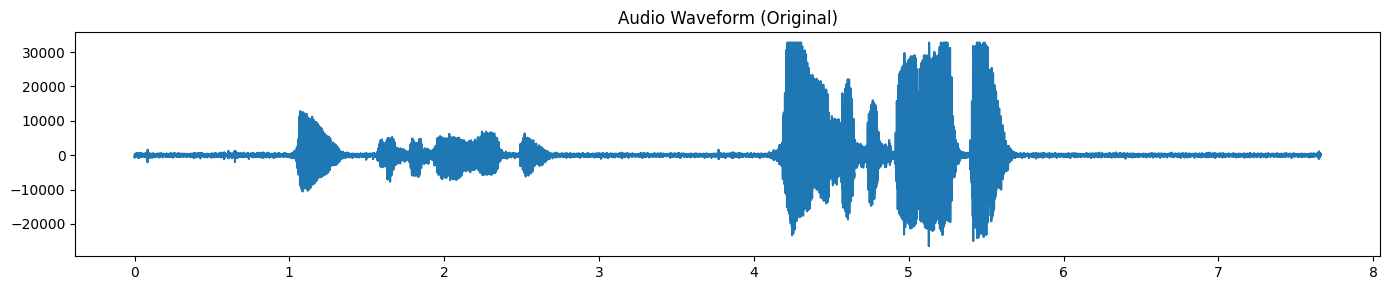

In [95]:
time_axis_second = np.linspace(0, n_samples/fs, n_samples)

plt.figure(figsize=(14, 3))
plt.plot(time_axis_second, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

Langkah pertama: Menghitung niali maximum dari audio tersebut dan membuat treshold (ambang batas kompresi)

Dalam hal ini, `threshold` akan diset pada setengah dari nilai maksimum audio tersebut.

In [96]:
max_val = np.max(np.abs(audio_data))
print(f"Max value: {max_val}")

threshold = 0.4 * max_val
print(f"Threshold: {threshold}")

Max value: 32767
Threshold: 13106.800000000001


Duplicate the original wave just in case for comparison

In [97]:
compressed_audio = audio_data.copy()

Langkah ketiga: Membuat masking (`mask`)

`mask` adalah sebuah indeks yang menujukkan di mana saja audio tersebut melebihi `threshold`

In [98]:
mask = np.abs(compressed_audio) > threshold
print(f"Jumlah sampel yang harus dikompres: {np.sum(mask)}")

Jumlah sampel yang harus dikompres: 10116


Langkah keempat: Mengurangi level suara dari audio yang melebihi `threshold`

In [99]:
ratio = 6

compressed_audio[mask] = threshold + (np.abs(compressed_audio[mask]) - threshold) / ratio
compressed_audio = np.clip(compressed_audio, -max_val, max_val)

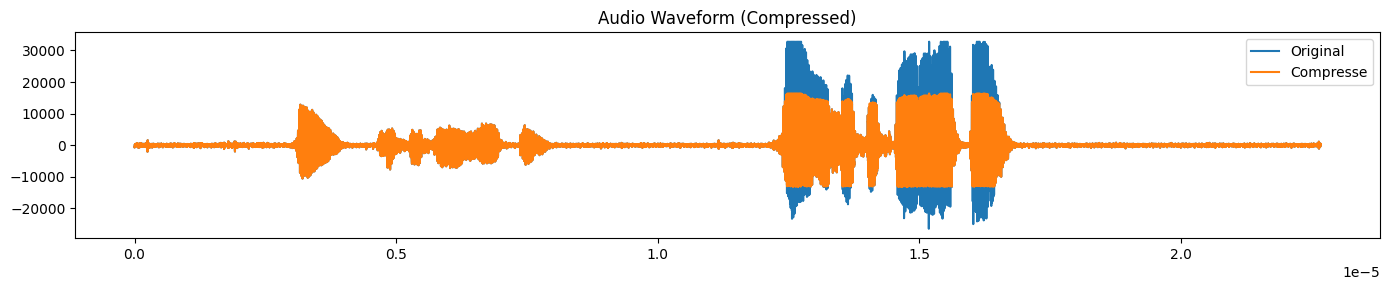

In [100]:
## Preview
time_axis = np.linspace(0, n_channels/fs, n_samples)

plt.figure(figsize=(14,3))
plt.plot(time_axis, audio_data, label="Original")
plt.plot(time_axis, compressed_audio, label="Compresse")
plt.title('Audio Waveform (Compressed)')
plt.tight_layout()
plt.legend()
plt.show()


Langkah kelima: Menaikkan keseluruhan level audio

Saat ini semua level audio sudah berada di bawah `threshold`. Sehingga, supaya semuanya memiliki level yang sama, kita perlu menaikkan level audio tersebut.

In [101]:
nilai_max = np.max(np.abs(compressed_audio))
compressed_audio_normalized = compressed_audio / nilai_max * 32767
compressed_audio_normalized = compressed_audio_normalized.astype(np.int16)

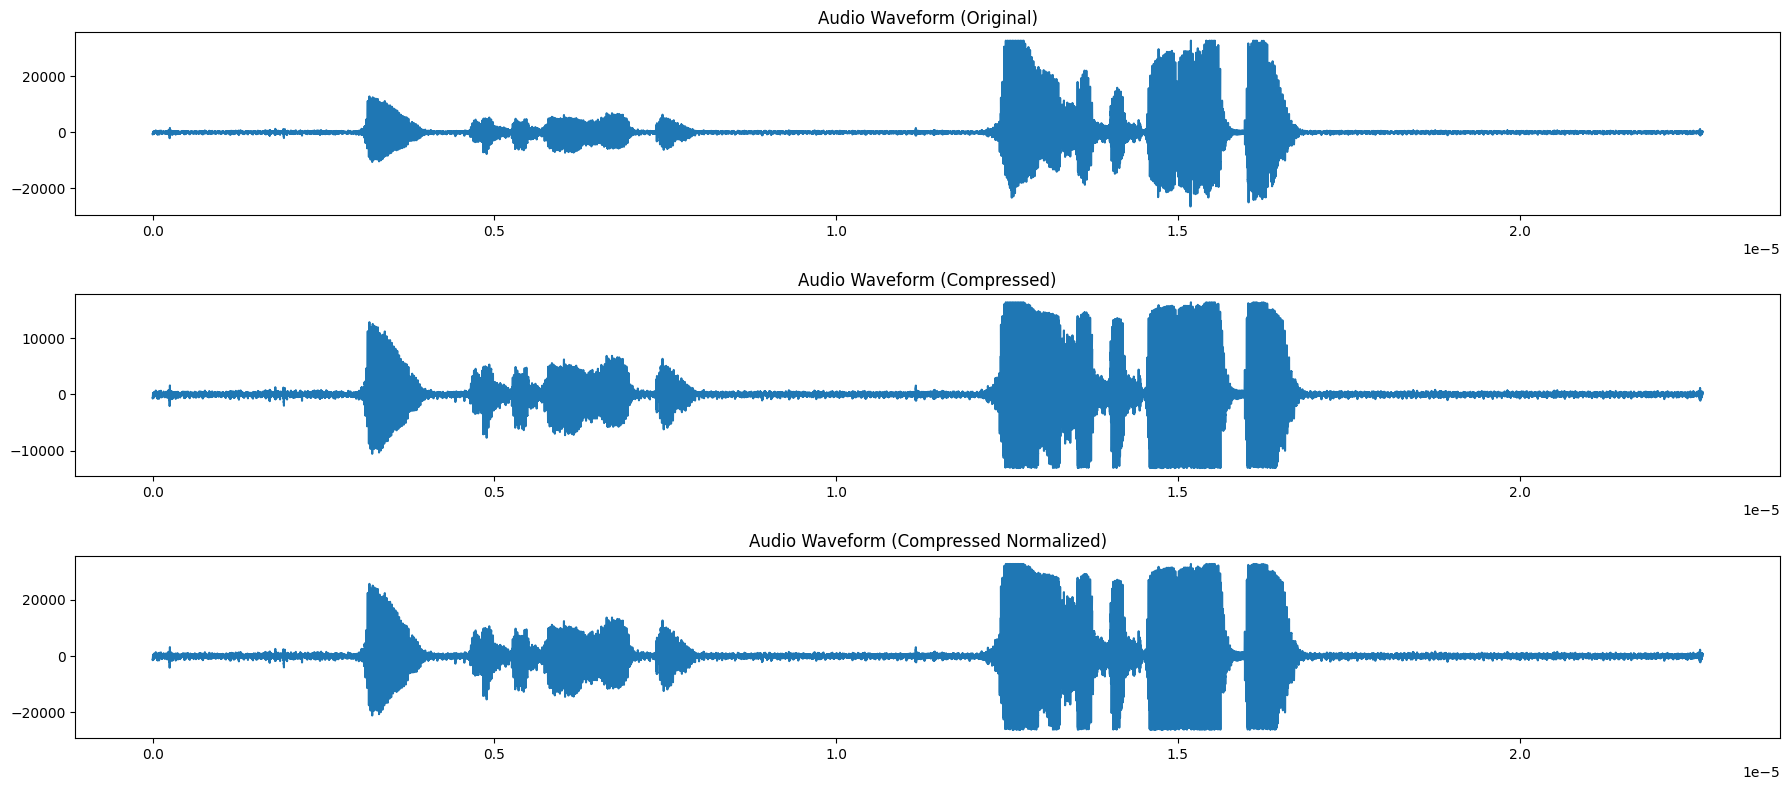

In [102]:
ax, fig = plt.subplots(3, 1, figsize=(18, 8))
fig[0].plot(time_axis, audio_data, label='Original')
fig[0].set_title('Audio Waveform (Original)')
fig[1].plot(time_axis, compressed_audio, label='Compressed')
fig[1].set_title('Audio Waveform (Compressed)')
fig[2].plot(time_axis, compressed_audio_normalized, label='Compressed Normalized')
fig[2].set_title('Audio Waveform (Compressed Normalized)')
plt.tight_layout()
plt.show()

# Equalization

Pernah mendengar istilah "treble" dan "bass" pada audio? Itu adalah bagian dari equalization.

## Teori Dasar

- **Low Pass Filter (High Cut)**: Low Pass Filter memungkinkan frekuensi rendah untuk lewat, sementara memblokir frekuensi tinggi. Filter ini digunakan untuk menghilangkan noise frekuensi tinggi atau untuk menghasilkan efek suara yang lebih halus.

- **High Pass Filter (Low Cut)**: High Pass Filter melewatkan frekuensi tinggi dan memblokir frekuensi rendah. Filter ini sering digunakan untuk menghilangkan hum atau suara mendengung yang biasanya berada di frekuensi rendah.

- **Bandpass Filter**: Bandpass Filter hanya melewatkan rentang frekuensi tertentu, sementara frekuensi di bawah dan di atas rentang ini diblokir. Filter ini berguna untuk mengekstrak sinyal pada rentang frekuensi tertentu dari sebuah sinyal yang lebih kompleks.

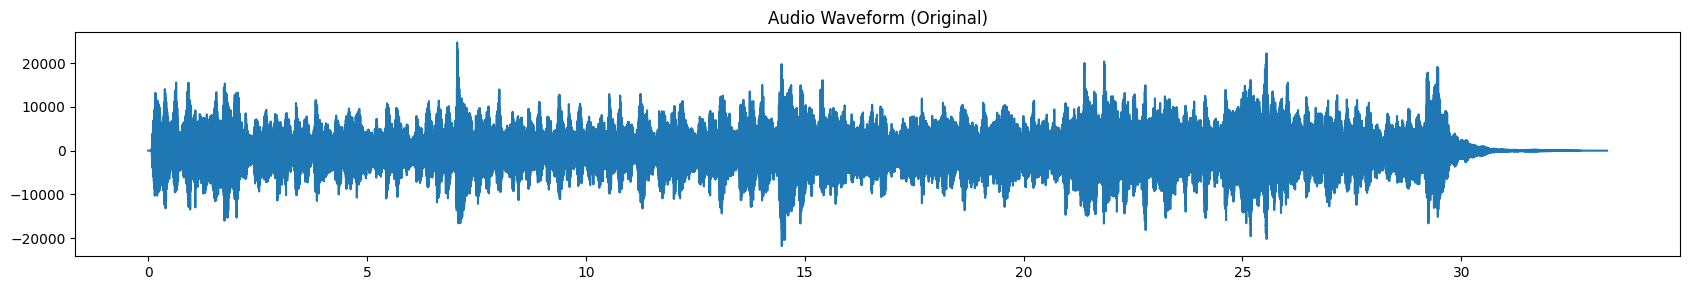

In [103]:
file_path = os.path.join(os.getcwd(), 'attachment', 'strings.wav')

with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sampwidth = wav_file.getsampwidth()
    framerate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    audio_content = wav_file.readframes(n_frames)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
time_axis = np.linspace(0, n_frames/framerate, n_frames)

plt.figure(figsize=(17, 3))
plt.plot(time_axis, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

## Visualisasi Spektrum Frekuensi Sebelum Equalization

Disediakan dalam bentuk fungsi

In [104]:
def plot_frequency_spectrum(data, framerate, title):
    fft_data = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(fft_data), 1 / framerate)
    
    positive_frequencies = frequencies[:len(frequencies) // 2]
    magnitude = np.abs(fft_data[:len(frequencies) // 2])
    
    plt.figure(figsize=(20, 6))
    plt.plot(positive_frequencies, magnitude)
    plt.xscale('log')
    plt.xlim(20, 20000)  # Rentang frekuensi yang relevan untuk audio
    plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000], 
               ['20 Hz', '50 Hz', '100 Hz', '200 Hz', '500 Hz', '1 kHz', '2 kHz', '5 kHz', '10 kHz', '20 kHz'])
    plt.title(title)
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

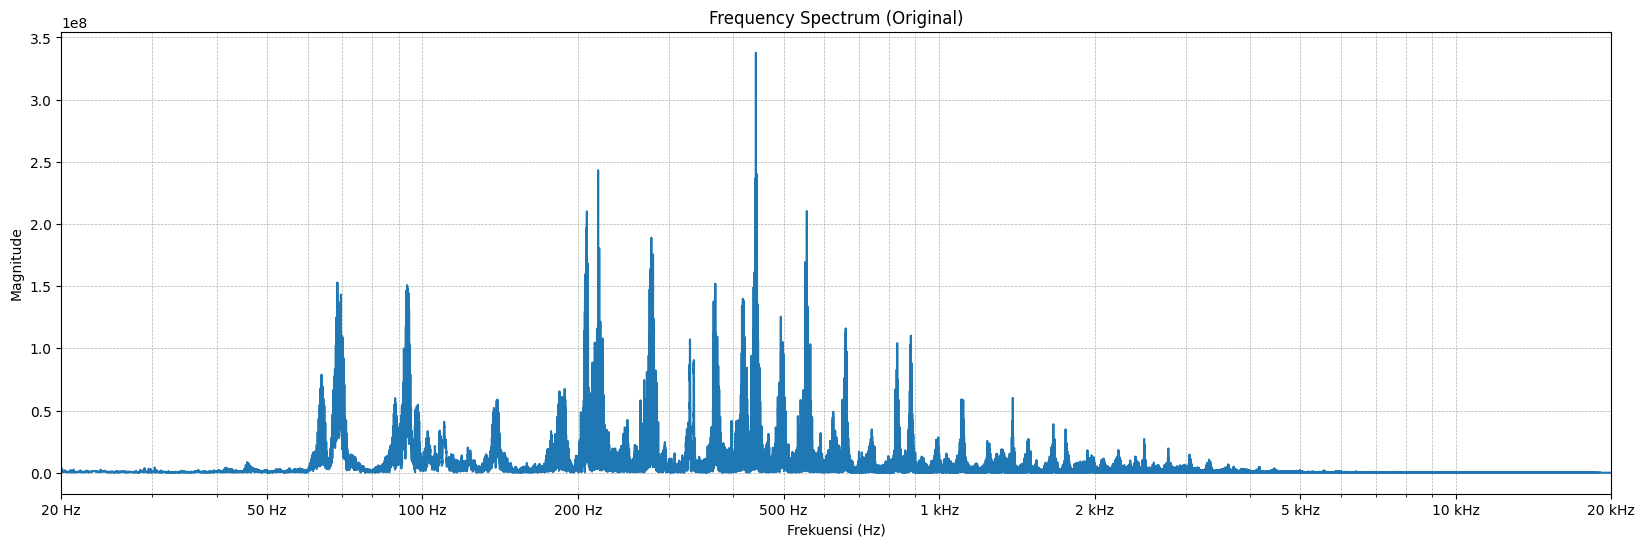

In [105]:
plot_frequency_spectrum(audio_data, framerate, 'Frequency Spectrum (Original)')

## Menerapkan Filter

### High Pass Filter (Low Cut)
High pass berarti melewatkan frekuensi high dan memblokir frekuensi low. Filter ini sering digunakan untuk menghilangkan hum atau suara mendengung yang biasanya berada di frekuensi rendah.

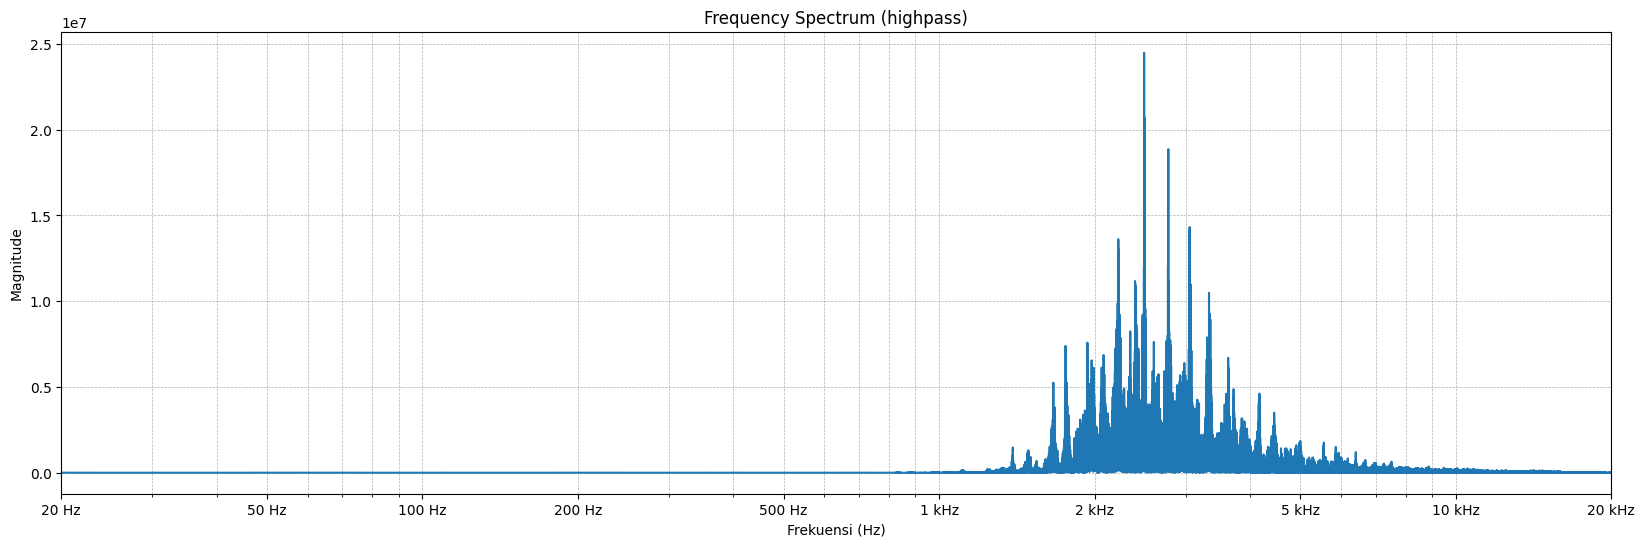

In [106]:
from scipy.signal import butter, filtfilt

cut_off = 2000 # hz
order = 5

b,a = butter(order, cut_off / (framerate / 2), btype='high')
audio_highpass = filtfilt(b, a, audio_data)

# konversi menjadi integer 16-bit
audio_highpass = audio_highpass.astype(np.int16)

plot_frequency_spectrum(audio_highpass, framerate, 'Frequency Spectrum (highpass)')

## Save as an audio

In [107]:
save_path = os.path.join(os.getcwd(), 'attachment', 'strings_highpass.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sampwidth)
    wav_file.setframerate(framerate)
    wav_file.writeframes(audio_highpass.tobytes())

## Low Pass Filter (High Cut)

Low pass berarti melewatkan frekuensi low dan memblokir frekuensi high. Filter ini digunakan untuk menghilangkan noise frekuensi tinggi atau untuk menghasilkan efek suara yang lebih halus.

In [108]:
cut_off = 400 # Cut off hz
order = 5

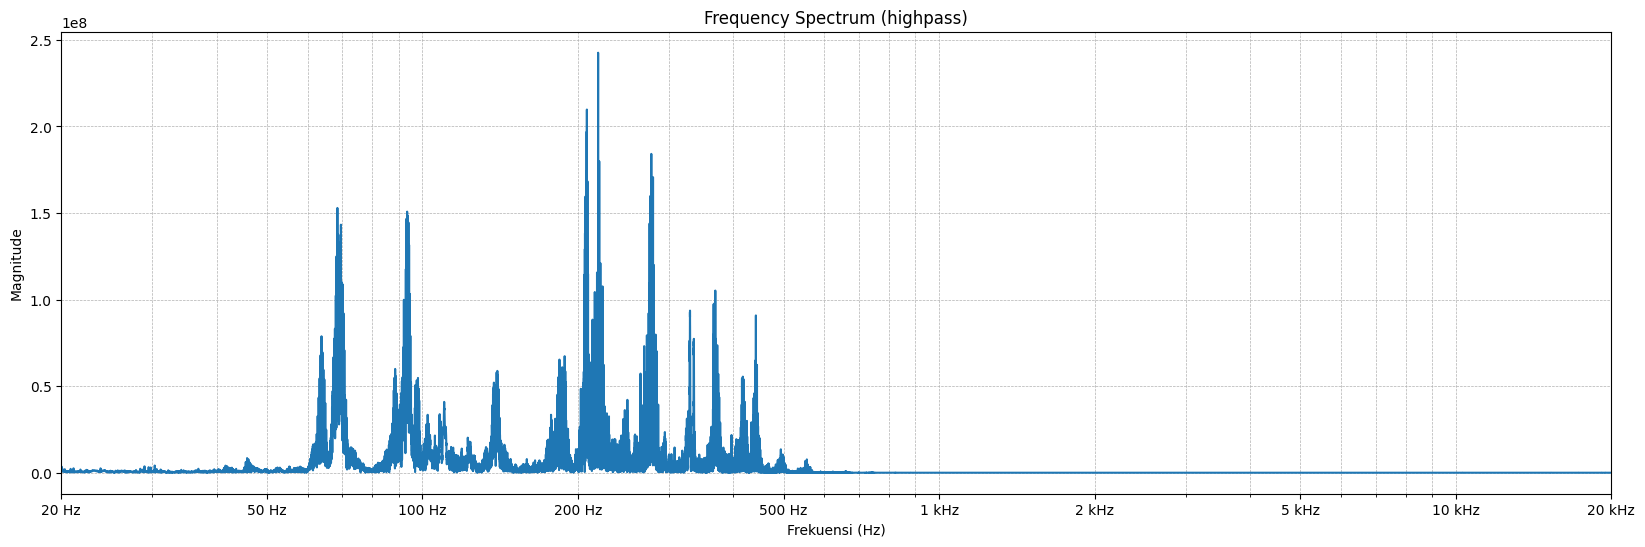

In [109]:
b,a = butter(order, cut_off / (framerate / 2), btype='Low')
audio_lowpass = filtfilt(b, a, audio_data)
audio_lowpass = audio_lowpass.astype(np.int16)

plot_frequency_spectrum(audio_lowpass, framerate, 'Frequency Spectrum (highpass)')

## Listen for the result


In [110]:
save_path = os.path.join(os.getcwd(), 'attachment', 'strings_lowpass.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sampwidth)
    wav_file.setframerate(framerate)
    wav_file.writeframes(audio_lowpass.tobytes())

## Bandpass Filter

Bandpass adalah filter yang hanya melewatkan rentang frekuensi tertentu, sementara frekuensi di bawah dan di atas rentang ini diblokir. Filter ini berguna untuk mengekstrak sinyal pada rentang frekuensi tertentu dari sebuah sinyal yang lebih kompleks.

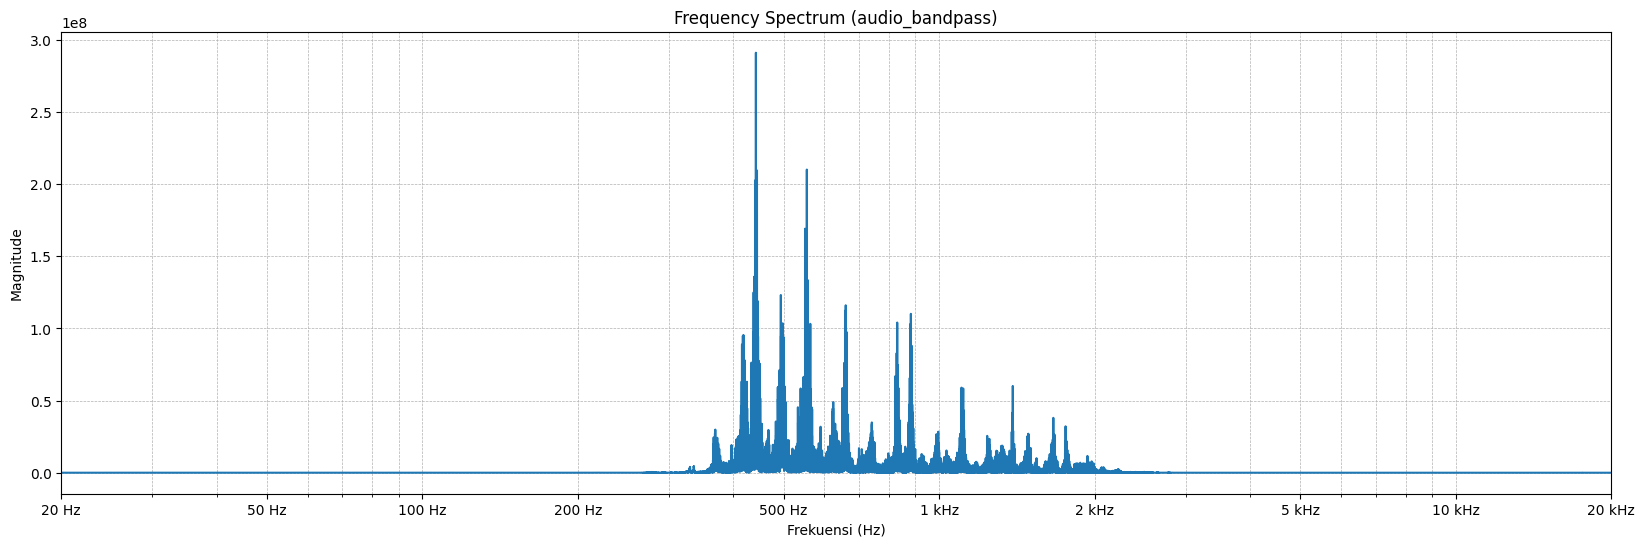

In [111]:
cut_off_low = 400 # hz, artinya frekuensi di bawah 400 hz akan dibuang
cut_off_high = 2000 # hz, artinya frekuensi di atas 2000 hz akan dibuang
order = 6

cut_off_low_nyquist = cut_off_low / (framerate / 2)
cut_off_high_nyquist = cut_off_high / (framerate / 2)

b,a = butter(order, [cut_off_low_nyquist, cut_off_high_nyquist], btype='band')
audio_bandpass = filtfilt(b, a, audio_data)
audio_bandpass = audio_bandpass.astype(np.int16)

plot_frequency_spectrum(audio_bandpass, framerate, 'Frequency Spectrum (audio_bandpass)')

In [112]:
## Listen for the Audio
save_path = os.path.join(os.getcwd(), 'attachment', 'strings_bandpass.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sampwidth)
    wav_file.setframerate(framerate)
    wav_file.writeframes(audio_bandpass.tobytes())